In [1]:
# 必要なライブラリのインストール
!pip install -q japanize-matplotlib

In [2]:
# 後で使う機能の準備
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import japanize_matplotlib


def plot(X, title=None, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=[4, 4])
    patch = patches.Polygon(
        xy=X.T[[0, 1, 2]],
        closed=True,
        facecolor="skyblue",
        edgecolor="black",
        linewidth=3,
    )
    ax.add_patch(patch)
    patch = patches.Polygon(
        xy=X.T[[0, 3, 2]],
        closed=True,
        facecolor="pink",
        edgecolor="black",
        linewidth=3,
    )
    ax.add_patch(patch)

    x, y = X
    ax.hlines(0, x.min() - 1, x.max() + 1, color="k")
    ax.vlines(0, y.min() - 1, y.max() + 1, color="k")
    ax.set_title(title, fontsize=16)
    ax.autoscale()
    ax.axis("equal")
    ax.grid()


def multiplot(*arr, titles=None):
    num = len(arr)
    if titles is None:
        titles = [None] * num
    _, axes = plt.subplots(1, num, figsize=[4 * num, 4])
    for x, ax, title in zip(arr, axes, titles):
        plot(x, title, ax)


def plot_eigvec(A, width):
    l, V = np.linalg.eig(A)
    if np.iscomplex(l).any():
        print("実数の固有値、固有ベクトルがない")
        return
    vx, vy = (l * V).T
    plt.arrow(0, 0, *vx, width=width, length_includes_head=True)
    plt.arrow(0, 0, *vy, width=width, length_includes_head=True)


In [3]:
X = np.array(
    [
        [0, 0],  # 左下の座標
        [1, 0],  # 右下の座標
        [1, 1],  # 右上の座標
        [0, 1],  # 左上の座標
    ]
).T


## 固有値と固有ベクトル

さて、色々な変換を見てきましたが、毎回この図を使ってイメージするのは面倒だし、多次元空間だとそもそも可視化不可能です。  
そんなとき、固有値は固有ベクトルを求めれば、とある行列 $A$ がどのように $X$ を変換するのかを知ることが出来ます。

これらは `np.linalg.eig` で求められます。今回は、グラフに固有ベクトルを表示する `plot_eigvec` 関数を使って観察していきます。

簡単に言うと、固有ベクトルは空間を伸ばしたり縮めたりする方向で、固有値はその強度を表します。

## 行列式

行列 $A$ を掛けることで空間がどれだけ拡大・縮小されるかを表します。(行列式) ＝ (固有値の積) です。

## いろんな行列



### 単位行列

行列式: 1.0


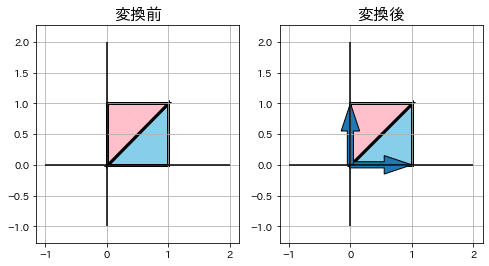

In [4]:
I = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)

Y = I @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(I, width=0.1)
print("行列式:", np.linalg.det(I))


### 直交行列


実数の固有値、固有ベクトルがない
行列式: 1.0


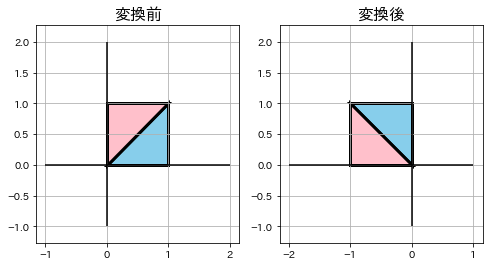

In [5]:
from numpy import sin, cos, pi

theta = pi / 2
R = np.array(
    [
        [cos(theta), -sin(theta)],
        [sin(theta), cos(theta)],
    ]
)

Y = R @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(R, width=0.1)
print("行列式:", np.linalg.det(R))


- 回転行列の固有ベクトルの成分は実数では表すことができません。
- 回転では面積が変わらないので、行列式は 1 になります。
- （興味あれば）回転行列の固有値は $e^{i\theta} = \cos\theta + i\sin\theta$ と表すことができるので、固有値からどのように回転したのかを逆算できます（以下、
  参照）。


In [6]:
l, _ = np.linalg.eigvals(R)
theta, np.angle(l)

(1.5707963267948966, 1.5707963267948966)

次に、裏返すタイプの直交行列を掛けてみましょう。以下の定義だと、$y=x\tan\theta$ に関して線対称に裏返します。



行列式: -1.0


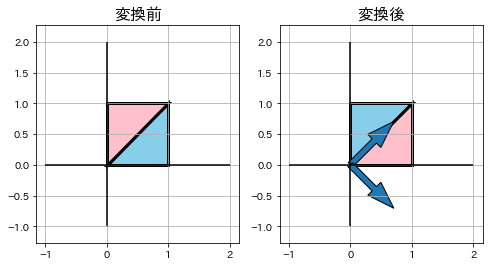

In [7]:
theta = pi / 4
U = np.array(
    [
        [cos(2 * theta), sin(2 * theta)],
        [sin(2 * theta), -cos(2 * theta)],
    ]
)

Y = U @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(U, width=0.1)
print("行列式:", np.linalg.det(U))


- 固有ベクトルは、裏返す基準になった線とその垂線になります。右下方向に `-1` を掛けることで裏返しています。
- 回転と同じく、反転では面積が変わりません。ただし、裏返した場合は、行列式は -1 になります。
  - 注: 裏返しを 2 回することは回転を 1 回することと同じです。なので、例えば x 軸も y 軸も裏返したときの行列式は 1 です。


### 対角行列

行列式: 2.0


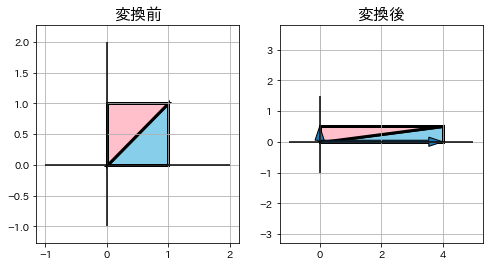

In [8]:
D = np.array(
    [
        [4, 0],  # x 方向に 4 倍
        [0, 0.5],  # y 方向に 0.5 倍
    ]
)

Y = D @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(D, width=0.1)
print("行列式:", np.linalg.det(D))


- 固有ベクトルは、xy 軸上にあります。
- 面積が $4*0.5=2$ 倍になるので行列式は 2 です。


### せん断行列

僕もせん断という言葉はあまり聞いたことがないです。線形代数の教科書でよく目にする用語に言い換えると、（全ての対角成分が 1 の）三角行列です。

行列式: 1.0


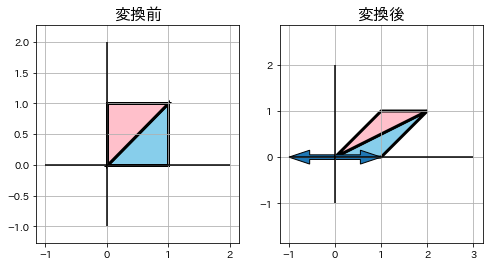

In [9]:
u = 1
U = np.array(
    [
        [1, u],  # x 方向に歪ませる
        [0, 1],  # y はそのまま
    ]
)

Y = U @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(U, width=0.1)
print("行列式:", np.linalg.det(U))


- 固有ベクトルを見ると、左右に歪ませていることが分かります。
- 対角成分が全て 1 なら、底辺と高さが変わらないので面積も変わらないため、行列式は 1 です。

行列式: 1.0


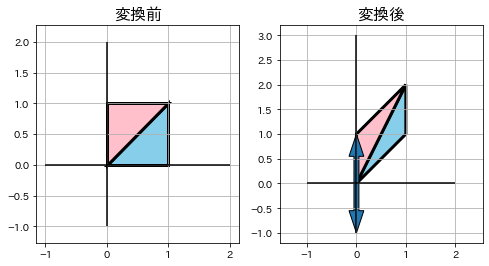

In [10]:
l = 1
L = np.array(
    [
        [1, 0],  # x はそのまま
        [l, 1],  # y 方向に歪ませる
    ]
)

Y = L @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(L, width=0.1)
print("行列式:", np.linalg.det(L))


### 非正則行列

Singular matrix
行列式: 0.0


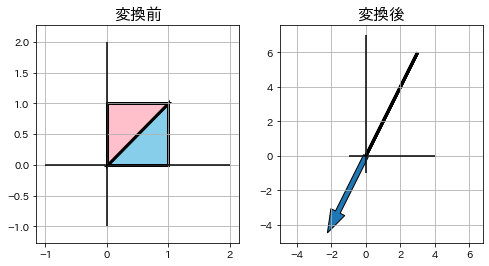

In [11]:
S = np.array(
    [
        [1, 2],
        [2, 4],
    ]
)

Y = S @ X
try:
    Z = np.linalg.inv(S) @ Y
except np.linalg.LinAlgError as e:
    print(e)
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(S, width=0.3)
print("行列式:", np.linalg.det(S))


- この図だと固有ベクトルが 1 本しか見えないですが、固有値 0 に対応する固有ベクトルもあります。
- 面積が 0 になるので行列式は 0 です。

### 一般的な行列

さて、なんの変哲もない行列 $A$ は何をしているのでしょうか。固有値・固有ベクトル・行列式だけで想像してみましょう。

行列式: -6.999999999999999


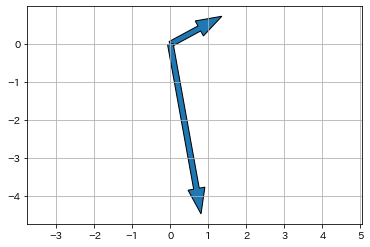

In [22]:
A = np.array(
    [
        [1, 1],
        [3, -4],
    ]
)

Y = A @ X
plot_eigvec(A, width=0.15)
plt.axis("equal")
plt.grid()
print("行列式:", np.linalg.det(A))


- 下向きに伸びてる。
- 行列式の絶対値が大きいので、空間がかなり拡大される。
- 行列式が負なので、裏返ってる。
- （細かいけど）固有ベクトルが直交していないので、僅かに歪んでる。
  
では、答え合わせ。

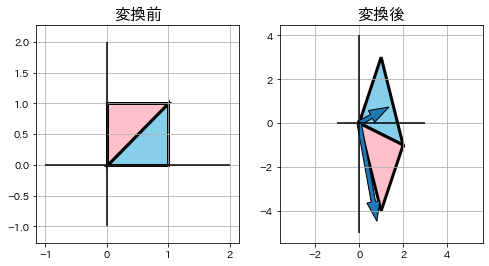

In [25]:
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(A, width=0.2)

ほらね。（完）